3.1)Elabore uma função em Python para realizar a filtragem espacial de imagens, similar à função
convolve2d do módulo scipy , que foi amplamento usada em exemplos discutidos em sala. Não
utilize bibliotecas auxiliares para implementar a função solicitada. Utilize o OpenCV ou
scikit-imagem apenas para operações de leitura ou aquisição de imagens, e Numpy para tratar sua
representação como matriz. Teste sua função com pelo menos dois filtros espaciais lineares.

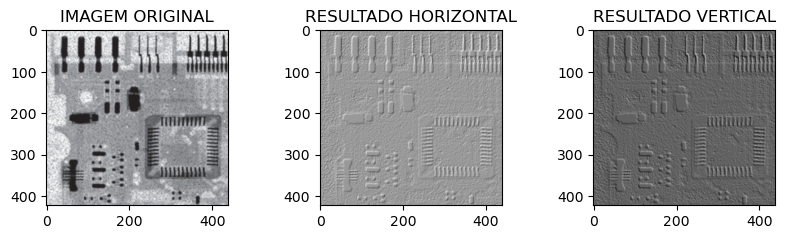

In [28]:
#substitui from scipy.signal import convolve2d por linhas de codigo
import numpy as np
import matplotlib.image as mpimg
from skimage import color
import matplotlib.pyplot as plt
from IPython.display import display, HTML

def convolution(image, kernel):
    height, width = image.shape
    k_height, k_width = kernel.shape

    # Inicializei a matriz resultante
    result = np.zeros_like(image, dtype=float)

    # Finalmente, apliquei a convolução
    for i in range(height):
        for j in range(width):
            result[i, j] = np.sum(image[i:i+k_height, j:j+k_width] * kernel)

    return result

def print_large_text(text):
    display(HTML(f'<h1>{text}</h1>'))
print_large_text("O codigo utiliza a função convolution para aplicar a convolução com os filtros espaciais de Roberts para detecção de bordas horizontais e verticais")


# Filtro de Roberts para a detecção horizontal
roberts_horizontal = np.array([[1, 0], [0, -1]])

# Filtro de Roberts para a detecção vertical
roberts_vertical = np.array([[0, 1], [-1, 0]])

# Imagem exemplo da skimage, tambem utilizada em sala
image = mpimg.imread('img1.png')

# Remover o canal alfa (se existir)
if image.shape[2] == 4:
    image = image[:, :, :3]  # Manter apenas os primeiros 3 canais RGB

# Convertendo a imagem para escala de cinza
image_gray = color.rgb2gray(image)

# Apliquei convolução para o filtro horizontal
result_horizontal = convolution(image_gray, roberts_horizontal)

# Apliquei convolução para o filtro vertical
result_vertical = convolution(image_gray, roberts_vertical)

# Display
plt.figure(figsize=(10, 5))

plt.subplot(231)
plt.imshow(image, cmap='gray')
plt.title('IMAGEM ORIGINAL')

plt.subplot(232)
plt.imshow(result_horizontal, cmap='gray')
plt.title('RESULTADO HORIZONTAL')

plt.subplot(233)
plt.imshow(result_vertical, cmap='gray')
plt.title('RESULTADO VERTICAL')


plt.show()

3.2)Elabore uma função em Python para realizar a filtragem por filtros de estatística de ordem - mediana
e máximo. Sua função deve ser similar a outras dos pacotes de processamento de imagens, como a
função median do módulo scikit-image.filters , usada em exemplo discutido em sala. Não utilize
bibliotecas auxiliares para implementar a função solicitada, nem fazer ordenação de conjuntos,
nem calcular o máximo. Utilize o OpenCV ou scikit-imagem apenas para operações de leitura ou
aquisição de imagens, e Numpy para tratar sua representação como matriz. Utilize um parâmetro
inteiro para indicar a ordem do filtro. Sendo assim, assuma que o filtro seja sempre quadrado, de
dimensão dada por este parâmetro. Apresente os testes da aplicação dos dois filtros solicitados.

In [11]:
!pip install opencv-python

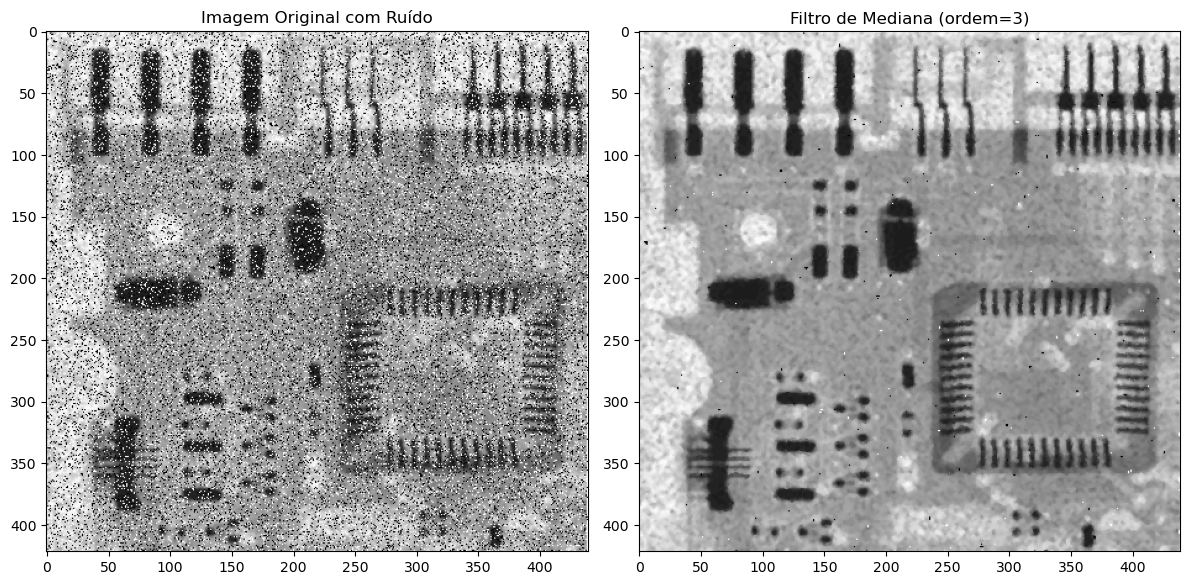

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_median_filter(image, order):
    height, width = image.shape
    result = np.zeros_like(image, dtype=np.uint8)

    for i in range(height):
        for j in range(width):
            start_i = max(0, i - order // 2)
            end_i = min(height, i + order // 2 + 1)
            start_j = max(0, j - order // 2)
            end_j = min(width, j + order // 2 + 1)

            window = image[start_i:end_i, start_j:end_j]
            result[i, j] = np.median(window)

    return result

# Gerar imagem embaçada com ruído como no código feito em sala
img = cv2.imread('img1.png', cv2.IMREAD_GRAYSCALE)
ruido = np.random.uniform(size=img.shape)
img[ruido > 0.9] = 255  # Ruído sal
img[ruido < 0.1] = 0    # Ruído pimenta

# Aplicar filtro de mediana
order_median = 3  # Tamanho do filtro
img_median = apply_median_filter(img, order_median)

# Exibir os resultados
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('Imagem Original com Ruído')

plt.subplot(122)
plt.imshow(img_median, cmap='gray')
plt.title(f'Filtro de Mediana (ordem={order_median})')

plt.tight_layout()  # Adicionado para ajustar automaticamente os espaços
plt.show()


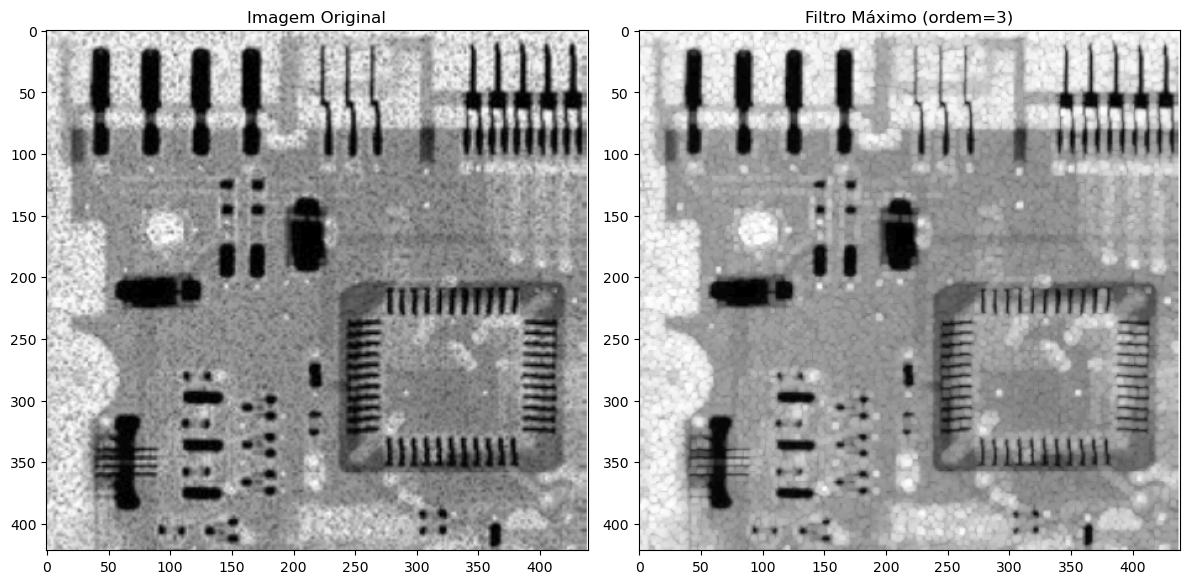

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_max_filter(image, order):
    height, width = image.shape
    result = np.zeros_like(image, dtype=np.uint8)

    for i in range(height):
        for j in range(width):
            start_i = max(0, i - order // 2)
            end_i = min(height, i + order // 2 + 1)
            start_j = max(0, j - order // 2)
            end_j = min(width, j + order // 2 + 1)

            window = image[start_i:end_i, start_j:end_j]
            result[i, j] = np.max(window)

    return result

# Carregar a imagem "img1.png"
image = cv2.imread('img1.png', cv2.IMREAD_GRAYSCALE)

# Aplicar filtro máximo
order_max = 3  # Tamanho do filtro
img_max = apply_max_filter(image, order_max)

# Exibir os resultados
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Imagem Original')

plt.subplot(122)
plt.imshow(img_max, cmap='gray')
plt.title(f'Filtro Máximo (ordem={order_max})')

plt.tight_layout()  # Adicionado para ajustar automaticamente os espaços
plt.show()

Helena Carvalho Leal  